In [37]:


def disconnected(AdjMat,b):   #b is the size of of the testblock
    ans= sum(sum(AdjMat))/2
    return ans!=b-1

def connected(AdjMat,b): #b is the size of of the testblock
    ans= sum(sum(AdjMat))/2
    return ans==b-1
    
        
    
def sieve(AdjMat,setpartitions):
    lsetpartitions=list(setpartitions)
    lset=lsetpartitions[:]
    for i,partition in enumerate(lsetpartitions):
        for block in partition:
            testblock=list(block)
            testblock[:]=[x-1 for x in testblock]
            testadj=AdjMat[testblock,testblock]
            if disconnected(testadj,len(testblock)):
                lset.remove(lsetpartitions[i])
                break
            else:
                continue
    return lset

                
                


##Code from:
## http://sheaves.github.io/Partitions-and-Posets/

def Partition_Poset(X):
    return Poset((SetPartitions(X),lambda q,p: q in p.refinements()))



def p_label(p):
    out = ""
    for block in p:
        for elm in block:
            
            out += str(elm)
        out += "|"
    return out[:-1]



def tubes(n,AdjMat):
    subsets=Subsets(list(range(1,N+1))).list()
    subsets.remove(subsets[0])
    subsetn=subsets[:]
    marked=[]
    for i,sub in enumerate(subsetn):
        testblock=list(sub)
        testblock[:]=[x-1 for x in testblock]
        testadj=AdjMat[testblock,testblock]
        if disconnected(testadj,len(testblock)):
            marked.append(sub)
        else:
            continue
    for i in marked:
        subsetn.remove(i)
    return subsetn


def IDG(arg,Adjmat): #short for Induces Disconnected Graph
    testblock=list(arg)
    testblock[:]=[x-1 for x in testblock]
    testadj=Adjmat[testblock,testblock]
    if disconnected(testadj,len(testblock)):
        return True
    else:
        return False
    
    
def containment(a,b):
    if len(a) != len(b)-1:
        return False
    
    if not (a).issubset(b):
        return False

    return True    
    


## this only returns the tubings of length 2...
## recursion for pairwise comparison as the tubings get larger?
def tubings(n,Adjmat):
    tubings=[]
    marked=[]
    T = tubes(n,Adjmat)
    print("|T|= %d" %len(T)) 
    set_of_pairs = [(T[p1], T[p2]) for p1 in range(len(T)) for p2 in range(p1+1,len(T))]
    print("number of pairs of T = %d" %len(set_of_pairs)) #equal to len(T) choose 2 as you would expect
    for pair in set_of_pairs:
        if len(pair[0])==n or len(pair[1])==n:
            next
       # print pair,(pair[0]).intersection(pair[1]).is_empty(),len((pair[0])&(pair[1]))==len(pair[0]),(pair[1])&(pair[0]) #best way to debug at the moment is to print pair,condition
        elif ((pair[0]).intersection(pair[1]).is_empty()==False) and (len(pair[0]&pair[1])==len(pair[0]) or len(pair[1]&pair[0])==len(pair[1])): 
            tubings.append(list(pair))
        elif (pair[0]).intersection(pair[1]).is_empty() and IDG(pair[0]|pair[1],Adjmat)==True: ##IDG== True means its not a tube
            tubings.append(list(pair))
        else:
            continue
    #insert recursion here?
            
    return (tubings)


def intersect(lst1, lst2):
    # Use of hybrid method
    lst3 = [value for value in lst1 if value in lst2]
 #   for elm in lst1:
  #      if elm&
    return lst3



def fcn(A, B):
    
    if len(A) != len(B)+1:
        return False

    for a in A:
        if not any(set(a).issubset(b) for b in B):
            return False
    return True

def mrefinements(A,B):
    if len(A)!=len(B)+1:
        return False
    for a in A:
        if not any(set(a).issubset(b) for b in B):
            return False
    return True





    

In [52]:
#########################

N=8  #number of vertice/elements in graph/partition

#########################


P= graphs.PathGraph(N) 
S=graphs.StarGraph(N-1) #the Sage's Star Graph actually graphs N+1 vertices instead of N so I put N-1 here to account for that
pathadj= P.adjacency_matrix()    #default ordering of rows and columns is from 0 to N
staradj= S.adjacency_matrix()

if N<4:
    staradj=pathadj


    
pathlattice= sieve(pathadj,SetPartitions(N))


# takes about 7.39 seconds for n=8, where B8 = 4140 -> 128
# takes about 48 seconds for n=9, where B9 = 21147 -> 256
# takes 368.3870821 seconds for n=10, where B10= 115975 -> 512
# takes 4742.04741216 seconds for n=11, where B11= 678570 -> 1024

#Powers of 2: a(n) = 2^n. 
#1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024




StarPo=Poset((sieve(staradj,SetPartitions(N)),lambda q,p: q in p.refinements()))
PathPo=Poset((sieve(pathadj,SetPartitions(N)),lambda q,p: q in p.refinements()))

len(sieve(pathadj,SetPartitions(N)))



128

In [50]:
def tubings(n,Adjmat):
    tubings=[]
    marked=[]
    T = tubes(n,Adjmat)
    print("|T|= %d" %len(T)) 
    set_of_pairs = [(T[p1], T[p2]) for p1 in range(len(T)) for p2 in range(p1+1,len(T))]
    print("number of pairs of T = %d" %len(set_of_pairs)) #equal to len(T) choose 2 as you would expect
    for pair in set_of_pairs:
        if len(pair[0])==n or len(pair[1])==n:
            next
       # print pair,(pair[0]).intersection(pair[1]).is_empty(),len((pair[0])&(pair[1]))==len(pair[0]),(pair[1])&(pair[0]) #best way to debug at the moment is to print pair,condition
        elif ((pair[0]).intersection(pair[1]).is_empty()==False) and (len(pair[0]&pair[1])==len(pair[0]) or len(pair[1]&pair[0])==len(pair[1])): 
            tubings.append(list(pair))
        elif (pair[0]).intersection(pair[1]).is_empty() and IDG(pair[0]|pair[1],Adjmat)==True: ##IDG== True means its not a tube
            tubings.append(list(pair))
        else:
            continue
    #insert recursion here?
            
    return (tubings)

def tubes(n,AdjMat):
    subsets=Subsets(list(range(1,N+1))).list()
    subsets.remove(subsets[0])
    subsetn=subsets[:]
    marked=[]
    for i,sub in enumerate(subsetn):
        testblock=list(sub)
        testblock[:]=[x-1 for x in testblock]
        testadj=AdjMat[testblock,testblock]
        if disconnected(testadj,len(testblock)):
            marked.append(sub)
        else:
            continue
    for i in marked:
        subsetn.remove(i)
    return subsetn


tubs=tubings(N,pathadj)
print tubs
#print('experiment',intersect([{1},{3,4}],[{1},{1,2,3,4}]))
#do not count maximum tubes

print "# of tubings, list of tubings:",len(tubs),tubs



tubes=[]
for i in tubs:
    for j in i:
        tubes.append(j)
        
tubes=list(set(tubes))
print tubes



allunion=(Set(set().union(*tubes)))
print(allunion)
facelattice=tubs+(tubes)+list(Set(allunion))

print(facelattice)

#flPo=Poset((facelattice,fcn))
#flPo.plot()


# tubespo= Poset(((tubes(N,pathadj)),containment),cover_relations=True) ##NOTE: ordered by containment
# tubespo.plot(vertex_size=300)




|T|= 36
number of pairs of T = 630
[[{1}, {3}], [{1}, {4}], [{1}, {5}], [{1}, {6}], [{1}, {7}], [{1}, {8}], [{1}, {1, 2}], [{1}, {3, 4}], [{1}, {4, 5}], [{1}, {5, 6}], [{1}, {6, 7}], [{1}, {8, 7}], [{1}, {1, 2, 3}], [{1}, {3, 4, 5}], [{1}, {4, 5, 6}], [{1}, {5, 6, 7}], [{1}, {8, 6, 7}], [{1}, {1, 2, 3, 4}], [{1}, {3, 4, 5, 6}], [{1}, {4, 5, 6, 7}], [{1}, {8, 5, 6, 7}], [{1}, {1, 2, 3, 4, 5}], [{1}, {3, 4, 5, 6, 7}], [{1}, {8, 4, 5, 6, 7}], [{1}, {1, 2, 3, 4, 5, 6}], [{1}, {3, 4, 5, 6, 7, 8}], [{1}, {1, 2, 3, 4, 5, 6, 7}], [{2}, {4}], [{2}, {5}], [{2}, {6}], [{2}, {7}], [{2}, {8}], [{2}, {1, 2}], [{2}, {2, 3}], [{2}, {4, 5}], [{2}, {5, 6}], [{2}, {6, 7}], [{2}, {8, 7}], [{2}, {1, 2, 3}], [{2}, {2, 3, 4}], [{2}, {4, 5, 6}], [{2}, {5, 6, 7}], [{2}, {8, 6, 7}], [{2}, {1, 2, 3, 4}], [{2}, {2, 3, 4, 5}], [{2}, {4, 5, 6, 7}], [{2}, {8, 5, 6, 7}], [{2}, {1, 2, 3, 4, 5}], [{2}, {2, 3, 4, 5, 6}], [{2}, {8, 4, 5, 6, 7}], [{2}, {1, 2, 3, 4, 5, 6}], [{2}, {2, 3, 4, 5, 6, 7}], [{2}, {1, 2, 3, 4, 5, 

mobius func on {{1}, {2}, {3}, {4}} , {{1, 2, 3, 4}} =-6


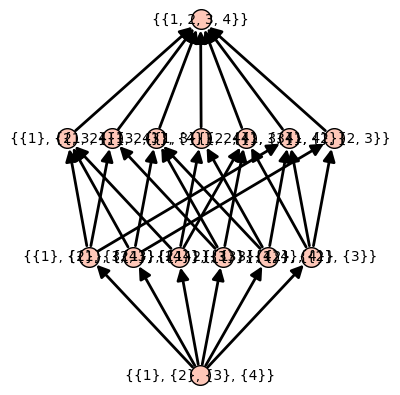

In [15]:

##example of how to write the cover relation for a poset

elms = SetPartitions(4)
def fcn(A, B):
    
    if len(A) != len(B)+1:
        return False

    for a in A:
        if not any(set(a).issubset(b) for b in B):
            return False
    return True

P=Poset((elms, fcn))#, cover_relations=True)
index1=P[0]
index2=P[len(P)-1]
mobfunc=P.moebius_function(index1, index2)
print("mobius func on {} , {} ={}".format(index1,index2,mobfunc))
P.plot()
#(polytopes.simplex().plot())

mobius func on {{1}, {2}, {3}} , {{1, 2, 3}} =1
[ 1 -1 -1  1]
[ 0  1  0 -1]
[ 0  0  1 -1]
[ 0  0  0  1]


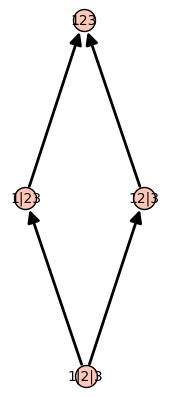

In [14]:
#S.show()
index1=StarPo[0]
index2=StarPo[-1]
mobfunc=StarPo.moebius_function(index1, index2)
print("mobius func on {} , {} ={}".format(index1,index2,mobfunc))
print(StarPo.moebius_function_matrix())
StarPo.plot(element_labels={x:p_label(x) for x in StarPo},vertex_size=250)


mobius func on {{1}, {2}, {3}} , {{1, 2, 3}} =1
[ 1 -1 -1  1]
[ 0  1  0 -1]
[ 0  0  1 -1]
[ 0  0  0  1]


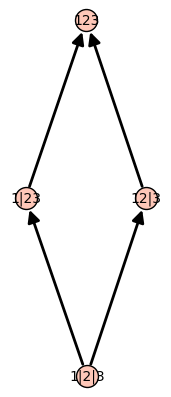

In [10]:
#P.show()
index1=PathPo[0]
index2=PathPo[-1]
mobfunc=PathPo.moebius_function(index1, index2)
print("mobius func on {} , {} ={}".format(index1,index2,mobfunc))
print(PathPo.moebius_function_matrix())

PathPo.plot(element_labels={x:p_label(x) for x in PathPo},vertex_size=250)


In [13]:
"""
IDEA: generate a set of superscripts with unique ID corresponding to each partition
then, stitch together the superscripts with the partitions
kinda like IKEA furniture or something
"""

import itertools as it
import numpy as np

p=list(SetPartitions(5))
sep=[]
ex=p[15]
print ex
for i,block in enumerate(ex):
    sep.append(len(block))
    
    ##matrix of possible superscripts

print sep
supers=dict()


#result = np.prod(sep)  #gives the number of weighted partitions for a given unweighted partition


for i,j in enumerate(sep):
    sep[i]=list(range(0,j))


    

print len(sep)

def supers(*args):
    return list(it.product(*args))   
supers(*sep)

###############
###############

##counts number of weighted setpartitions corresponding to the path graph
print N
counting=[]

whitewhale= pathlattice

for i in whitewhale:
    counting.append([block for block in i])

counts=list(list(len(i) for i in counting[j]) for j in range(0,len(counting)))
print(pathlattice)
print(counts)
finalcount= ((np.prod(i)) for i in counts)

#for i in range(0,len(whitewhale)):
#    print(counts[i],whitewhale[i])

#print counts,list(finalcount)
Nwtparts= sum(finalcount)
print "went from %d unweighted to %d weighted" %(len(whitewhale),Nwtparts)



# note that n>3 is when the path graph differs from the star graph
# n=4 went from 8 unweighted to 21 weighted
# n=5 went from 16 unweighted to 55 weighted
# n=6 went from 32 unweighted to 144 weighted
# n=7 went from 64 unweighted to 377 weighted
# n=8 went from 128 unweighted to 987 weighted
# n=9 went from 256 unweighted to 2584 weighted
# n=10 went from 512 unweighted to 6765 weighted


#follows: https://oeis.org/search?q=21%2C55%2C144%2C377&sort=&language=english&go=Search
#F(2n) = bisection of Fibonacci sequence: a(n) = 3*a(n-1) - a(n-2). 
###############
###############


{{1, 2, 3}, {4, 5}}
[3, 2]
2
3
[{{1, 2, 3}}, {{1}, {2, 3}}, {{1, 2}, {3}}, {{1}, {2}, {3}}]
[[3], [1, 2], [2, 1], [1, 1, 1]]
went from 4 unweighted to 8 weighted
